In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# clinical_lab = pd.read_csv('../data/WHO_NREVSS_Clinical_Labs.csv')
public_lab = pd.read_csv('../data/WHO_NREVSS_Public_Health_Labs.csv')
early_data_10_15 = pd.read_csv('../data/WHO_NREVSS_Combined_prior_to_2015_16.csv')
pop_data = pd.read_csv('../data/nst-est2020.csv')

In [3]:
# clinical_lab.drop(clinical_lab.columns[[0]], axis =1, inplace = True)
# clinical_lab.head(300)
# public_lab.head(3)
pop_data.head(3)

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020
0,10,0,0,0,United States,308745538,308758105,309327143,311583481,313877662,316059947,318386329,320738994,323071755,325122128,326838199,328329953,329398742,329484123
1,20,1,0,0,Northeast Region,55317240,55318414,55380764,55608318,55782661,55912775,56021339,56052790,56063777,56083383,56084543,56002934,55924275,55849869
2,20,2,0,0,Midwest Region,66927001,66929737,66975328,67164092,67348275,67576524,67765576,67885682,68018175,68160342,68263019,68340091,68357895,68316744


In [4]:
# pop_data['YEAR'] = ''
pop_data.drop(pop_data.columns[[0, 1, 2, 3, 6, 7, 17]], axis =1, inplace = True)
pop_data = pop_data.rename(columns={'NAME': 'REGION', 'CENSUS2010POP':'2010', 'POPESTIMATE2011':'2011', 
                                    'POPESTIMATE2012':'2012', 'POPESTIMATE2013':'2013', 'POPESTIMATE2014':'2014', 
                                    'POPESTIMATE2015':'2015', 'POPESTIMATE2016':'2016', 'POPESTIMATE2017':'2017', 
                                    'POPESTIMATE2018':'2018', 'POPESTIMATE2019':'2019', 'POPESTIMATE2020':'2020'})
pop_data.head(10)

,REGION,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,308745538,311583481,313877662,316059947,318386329,320738994,323071755,325122128,326838199,328329953,329484123
1,Northeast Region,55317240,55608318,55782661,55912775,56021339,56052790,56063777,56083383,56084543,56002934,55849869
2,Midwest Region,66927001,67164092,67348275,67576524,67765576,67885682,68018175,68160342,68263019,68340091,68316744
3,South Region,114555744,116019483,117264196,118397213,119666248,121049223,122419547,123611036,124649156,125686544,126662754
4,West Region,71945553,72791588,73482530,74173435,74933166,75751299,76570256,77267367,77841481,78300384,78654756
5,Alabama,4779736,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532
6,Alaska,710231,722349,730810,737626,737075,738430,742575,740983,736624,733603,731158
7,Arizona,6392017,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401
8,Arkansas,2915918,2941038,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3030522
9,California,37253956,37636311,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39368078


In [5]:
pop_data = pop_data.drop([0, 1, 2, 3, 4])
pop_data.head(10)

,REGION,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5,Alabama,4779736,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532
6,Alaska,710231,722349,730810,737626,737075,738430,742575,740983,736624,733603,731158
7,Arizona,6392017,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401
8,Arkansas,2915918,2941038,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3030522
9,California,37253956,37636311,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39368078
10,Colorado,5029196,5121900,5193660,5270774,5352637,5454328,5543844,5617421,5697155,5758486,5807719
11,Connecticut,3574097,3588632,3595211,3595792,3595697,3588561,3579830,3575324,3574561,3566022,3557006
12,Delaware,897934,907590,915518,924062,933131,942065,949989,957942,966985,976668,986809
13,District of Columbia,601723,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
14,Florida,18801310,19055607,19302016,19551678,19853880,20219111,20627237,20977089,21254926,21492056,21733312


In [6]:
ndf = pop_data.melt(id_vars=['REGION'],
             var_name='YEAR',
             value_name='POPULATION')
ndf.head(15)

,REGION,YEAR,POPULATION
0,Alabama,2010,4779736
1,Alaska,2010,710231
2,Arizona,2010,6392017
3,Arkansas,2010,2915918
4,California,2010,37253956
5,Colorado,2010,5029196
6,Connecticut,2010,3574097
7,Delaware,2010,897934
8,District of Columbia,2010,601723
9,Florida,2010,18801310


In [7]:
ndf.YEAR = ndf.YEAR.astype(int)
ndf.head(3)

,REGION,YEAR,POPULATION
0,Alabama,2010,4779736
1,Alaska,2010,710231
2,Arizona,2010,6392017


In [8]:
AL2 = ndf.loc[ndf.REGION == 'Alabama']
AL2

,REGION,YEAR,POPULATION
0,Alabama,2010,4779736
52,Alabama,2011,4799642
104,Alabama,2012,4816632
156,Alabama,2013,4831586
208,Alabama,2014,4843737
260,Alabama,2015,4854803
312,Alabama,2016,4866824
364,Alabama,2017,4877989
416,Alabama,2018,4891628
468,Alabama,2019,4907965


In [9]:
# clinical_lab.columns
# early_data_10_15.head(3)

In [10]:
early_data_10_15.drop(early_data_10_15.columns[[0, 4, 5]], axis =1, inplace = True)
early_data_10_15.head(3)
# early_data_10_15.WEEK.unique()

,REGION,YEAR,WEEK,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v
0,Alabama,2010,40,0,0,0,0,0,0,0
1,Alaska,2010,40,0,0,0,0,0,0,0
2,Arizona,2010,40,0,0,1,0,0,0,0


In [11]:
test = early_data_10_15[['REGION','YEAR', 'WEEK', 'A (2009 H1N1)', 'A (H1)', 'A (H3)', 'A (Subtyping not Performed)', 
                         'A (Unable to Subtype)', 'B', 'H3N2v']]
test.columns

Index(['REGION', 'YEAR', 'WEEK', 'A (2009 H1N1)', 'A (H1)', 'A (H3)',
       'A (Subtyping not Performed)', 'A (Unable to Subtype)', 'B', 'H3N2v'],
      dtype='object')

In [12]:
test['A (H1)'].dtype
test = test[test.YEAR != 2015]

In [13]:
test[['A (2009 H1N1)', 'A (H1)', 'A (H3)', 'A (Subtyping not Performed)', 'A (Unable to Subtype)', 'B', 
      'H3N2v']] = test[['A (2009 H1N1)', 'A (H1)', 'A (H3)', 'A (Subtyping not Performed)', 'A (Unable to Subtype)', 
                        'B', 'H3N2v']].apply(pd.to_numeric, errors='coerce')

In [14]:
test.columns

Index(['REGION', 'YEAR', 'WEEK', 'A (2009 H1N1)', 'A (H1)', 'A (H3)',
       'A (Subtyping not Performed)', 'A (Unable to Subtype)', 'B', 'H3N2v'],
      dtype='object')

In [15]:
# test2 = pd.pivot_table(
#     test,
#     index = ['WEEK'],
#     aggfunc = {'A (2009 H1N1)' : np.sum, 'A (H1)' : np.sum, 'A (H3)' : np.sum, 'A (Subtyping not Performed)' : np.sum, 
#                'A (Unable to Subtype)' : np.sum, 'B' : np.sum, 'H3N2v' : np.sum})
# test2.head(3)

In [16]:
test3 = test.groupby(['REGION', 'YEAR'], as_index=False)['A (2009 H1N1)', 'A (H1)', 'A (H3)',
       'A (Subtyping not Performed)', 'A (Unable to Subtype)', 'B', 'H3N2v'].sum()

test3

<ipython-input-16-954b03be97e9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test3 = test.groupby(['REGION', 'YEAR'], as_index=False)['A (2009 H1N1)', 'A (H1)', 'A (H3)',


,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v
0,Alabama,2010,6.0,0.0,39.0,3.0,0.0,232.0,0.0
1,Alabama,2011,140.0,0.0,160.0,29.0,0.0,241.0,0.0
2,Alabama,2012,11.0,0.0,446.0,10.0,0.0,41.0,0.0
3,Alabama,2013,64.0,0.0,109.0,6.0,0.0,39.0,0.0
4,Alabama,2014,49.0,0.0,124.0,522.0,0.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...
265,Wyoming,2010,0.0,0.0,7.0,2.0,0.0,0.0,0.0
266,Wyoming,2011,42.0,0.0,89.0,19.0,0.0,48.0,0.0
267,Wyoming,2012,30.0,0.0,199.0,15.0,0.0,43.0,0.0
268,Wyoming,2013,94.0,0.0,73.0,24.0,0.0,89.0,0.0


# 2015-2021 public lab data

In [17]:
public_lab.drop(public_lab.columns[[0, 3]], axis =1, inplace = True)
public_lab['SEASON_DESCRIPTION'] = public_lab['SEASON_DESCRIPTION'].str.replace(r'Season ', '')

In [18]:
public_lab['SEASON_DESCRIPTION'] = public_lab['SEASON_DESCRIPTION'].str.replace(r'-\d{2}', '', regex = True)
public_lab = public_lab.rename(columns={'SEASON_DESCRIPTION' : 'YEAR'})
public_lab.head(3000)

,REGION,YEAR,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,Alabama,2015,59,16,1,2,2,2,0
1,Alaska,2015,607,98,0,231,1,2,0
2,Arizona,2015,762,580,0,13,58,399,0
3,Arkansas,2015,20,8,0,1,12,0,0
4,California,2015,1462,854,35,775,309,803,0
...,...,...,...,...,...,...,...,...,...
373,Wisconsin,2021,0,189,22,3,1,0,0
374,Wyoming,2021,0,155,181,2,0,0,0
375,Puerto Rico,2021,0,0,0,0,0,0,0
376,Virgin Islands,2021,X,X,X,X,X,X,X


In [19]:
public_lab['A (H3)'].dtype

dtype('O')

In [20]:
public_lab.columns

Index(['REGION', 'YEAR', 'A (2009 H1N1)', 'A (H3)',
       'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v'],
      dtype='object')

In [21]:
public_lab[['A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 
            'H3N2v']] = public_lab[['A (2009 H1N1)', 'A (H3)','A (Subtyping not Performed)', 'B', 'BVic', 
                                    'BYam', 'H3N2v']].apply(pd.to_numeric, errors='coerce')
public_lab.head(3)

,REGION,YEAR,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,Alabama,2015,59.0,16.0,1.0,2.0,2.0,2.0,0.0
1,Alaska,2015,607.0,98.0,0.0,231.0,1.0,2.0,0.0
2,Arizona,2015,762.0,580.0,0.0,13.0,58.0,399.0,0.0


In [22]:
test3.head(3)

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v
0,Alabama,2010,6.0,0.0,39.0,3.0,0.0,232.0,0.0
1,Alabama,2011,140.0,0.0,160.0,29.0,0.0,241.0,0.0
2,Alabama,2012,11.0,0.0,446.0,10.0,0.0,41.0,0.0


In [23]:
public_lab.YEAR = public_lab.YEAR.astype(int)
public_lab.head()

,REGION,YEAR,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,Alabama,2015,59.0,16.0,1.0,2.0,2.0,2.0,0.0
1,Alaska,2015,607.0,98.0,0.0,231.0,1.0,2.0,0.0
2,Arizona,2015,762.0,580.0,0.0,13.0,58.0,399.0,0.0
3,Arkansas,2015,20.0,8.0,0.0,1.0,12.0,0.0,0.0
4,California,2015,1462.0,854.0,35.0,775.0,309.0,803.0,0.0


In [24]:
flu_df = pd.concat([test3, public_lab], axis = 0).fillna(0)

In [25]:
flu_df.reset_index()
flu_df.head(15)

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam
0,Alabama,2010,6.0,0.0,39.0,3.0,0.0,232.0,0.0,0.0,0.0
1,Alabama,2011,140.0,0.0,160.0,29.0,0.0,241.0,0.0,0.0,0.0
2,Alabama,2012,11.0,0.0,446.0,10.0,0.0,41.0,0.0,0.0,0.0
3,Alabama,2013,64.0,0.0,109.0,6.0,0.0,39.0,0.0,0.0,0.0
4,Alabama,2014,49.0,0.0,124.0,522.0,0.0,44.0,0.0,0.0,0.0
5,Alaska,2010,0.0,0.0,12.0,0.0,0.0,2.0,0.0,0.0,0.0
6,Alaska,2011,343.0,0.0,526.0,13.0,0.0,39.0,0.0,0.0,0.0
7,Alaska,2012,117.0,0.0,652.0,1.0,0.0,334.0,0.0,0.0,0.0
8,Alaska,2013,348.0,0.0,192.0,9.0,0.0,139.0,0.0,0.0,0.0
9,Alaska,2014,193.0,0.0,912.0,63.0,0.0,102.0,0.0,0.0,0.0


In [26]:
flu_df['Total'] = flu_df['A (2009 H1N1)']+flu_df['A (H1)']+flu_df['A (H3)']+flu_df['A (Subtyping not Performed)']+flu_df['A (Unable to Subtype)']+flu_df['B']+flu_df['H3N2v']+flu_df['BVic']+flu_df['BYam']

In [27]:
flupop = pd.merge(flu_df, ndf, how='left', left_on = ['REGION', 'YEAR'], right_on = ['REGION', 'YEAR'])
flupop.head(15)

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total,POPULATION
0,Alabama,2010,6.0,0.0,39.0,3.0,0.0,232.0,0.0,0.0,0.0,280.0,4779736.0
1,Alabama,2011,140.0,0.0,160.0,29.0,0.0,241.0,0.0,0.0,0.0,570.0,4799642.0
2,Alabama,2012,11.0,0.0,446.0,10.0,0.0,41.0,0.0,0.0,0.0,508.0,4816632.0
3,Alabama,2013,64.0,0.0,109.0,6.0,0.0,39.0,0.0,0.0,0.0,218.0,4831586.0
4,Alabama,2014,49.0,0.0,124.0,522.0,0.0,44.0,0.0,0.0,0.0,739.0,4843737.0
5,Alaska,2010,0.0,0.0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,710231.0
6,Alaska,2011,343.0,0.0,526.0,13.0,0.0,39.0,0.0,0.0,0.0,921.0,722349.0
7,Alaska,2012,117.0,0.0,652.0,1.0,0.0,334.0,0.0,0.0,0.0,1104.0,730810.0
8,Alaska,2013,348.0,0.0,192.0,9.0,0.0,139.0,0.0,0.0,0.0,688.0,737626.0
9,Alaska,2014,193.0,0.0,912.0,63.0,0.0,102.0,0.0,0.0,0.0,1270.0,737075.0


In [28]:
flupop['per 1000'] = flupop['Total'] / flupop['POPULATION'] * 1000
flupop.head(10)

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total,POPULATION,per 1000
0,Alabama,2010,6.0,0.0,39.0,3.0,0.0,232.0,0.0,0.0,0.0,280.0,4779736.0,0.058581
1,Alabama,2011,140.0,0.0,160.0,29.0,0.0,241.0,0.0,0.0,0.0,570.0,4799642.0,0.118759
2,Alabama,2012,11.0,0.0,446.0,10.0,0.0,41.0,0.0,0.0,0.0,508.0,4816632.0,0.105468
3,Alabama,2013,64.0,0.0,109.0,6.0,0.0,39.0,0.0,0.0,0.0,218.0,4831586.0,0.045120
4,Alabama,2014,49.0,0.0,124.0,522.0,0.0,44.0,0.0,0.0,0.0,739.0,4843737.0,0.152568
5,Alaska,2010,0.0,0.0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,710231.0,0.019712
6,Alaska,2011,343.0,0.0,526.0,13.0,0.0,39.0,0.0,0.0,0.0,921.0,722349.0,1.275007
7,Alaska,2012,117.0,0.0,652.0,1.0,0.0,334.0,0.0,0.0,0.0,1104.0,730810.0,1.510653
8,Alaska,2013,348.0,0.0,192.0,9.0,0.0,139.0,0.0,0.0,0.0,688.0,737626.0,0.932722
9,Alaska,2014,193.0,0.0,912.0,63.0,0.0,102.0,0.0,0.0,0.0,1270.0,737075.0,1.723027


In [29]:
year2010 = flu_df.loc[flu_df.YEAR == 2010]
year2011 = flu_df.loc[flu_df.YEAR == 2011]
year2012 = flu_df.loc[flu_df.YEAR == 2012]
year2013 = flu_df.loc[flu_df.YEAR == 2013]
year2014 = flu_df.loc[flu_df.YEAR == 2014]
year2015 = flu_df.loc[flu_df.YEAR == 2015]
year2016 = flu_df.loc[flu_df.YEAR == 2016]
year2017 = flu_df.loc[flu_df.YEAR == 2017]
year2018 = flu_df.loc[flu_df.YEAR == 2018]
year2019 = flu_df.loc[flu_df.YEAR == 2019]
year2020 = flu_df.loc[flu_df.YEAR == 2020]
year2020.Total.sum()

353.0

In [30]:
year2019.Total.sum()

43529.0

In [49]:
year2011.head()

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
1,Alabama,2011,140.0,0.0,160.0,29.0,0.0,241.0,0.0,0.0,0.0,570.0
6,Alaska,2011,343.0,0.0,526.0,13.0,0.0,39.0,0.0,0.0,0.0,921.0
11,Arizona,2011,410.0,0.0,991.0,24.0,0.0,314.0,0.0,0.0,0.0,1739.0
16,Arkansas,2011,106.0,0.0,118.0,26.0,0.0,197.0,0.0,0.0,0.0,447.0
21,California,2011,256.0,0.0,267.0,291.0,0.0,293.0,0.0,0.0,0.0,1107.0


In [32]:
year2019.head(55)


,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
216,Alabama,2019,174.0,0.0,6.0,0.0,0.0,5.0,0.0,123.0,0.0,308.0
217,Alaska,2019,102.0,0.0,25.0,6.0,0.0,375.0,0.0,0.0,0.0,508.0
218,Arizona,2019,632.0,0.0,33.0,0.0,0.0,38.0,0.0,560.0,8.0,1271.0
219,Arkansas,2019,146.0,0.0,1.0,4.0,0.0,54.0,0.0,45.0,0.0,250.0
220,California,2019,3055.0,0.0,272.0,182.0,0.0,475.0,0.0,1742.0,36.0,5762.0
221,Colorado,2019,552.0,0.0,53.0,10.0,0.0,145.0,0.0,187.0,0.0,947.0
222,Connecticut,2019,272.0,0.0,69.0,0.0,0.0,2.0,0.0,410.0,15.0,768.0
223,Delaware,2019,507.0,0.0,26.0,14.0,0.0,44.0,0.0,359.0,2.0,952.0
224,District of Columbia,2019,138.0,0.0,18.0,0.0,0.0,0.0,0.0,120.0,2.0,278.0
225,Florida,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
AL = flu_df.loc[flu_df.REGION == 'Alabama']
TN = flu_df.loc[flu_df.REGION == 'Tennessee']
OR = flu_df.loc[flu_df.REGION == 'Oregon']
HI = flu_df.loc[flu_df.REGION == 'Hawaii']
NY = flu_df.loc[flu_df.REGION == 'New York']

AL

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
0,Alabama,2010,6.0,0.0,39.0,3.0,0.0,232.0,0.0,0.0,0.0,280.0
1,Alabama,2011,140.0,0.0,160.0,29.0,0.0,241.0,0.0,0.0,0.0,570.0
2,Alabama,2012,11.0,0.0,446.0,10.0,0.0,41.0,0.0,0.0,0.0,508.0
3,Alabama,2013,64.0,0.0,109.0,6.0,0.0,39.0,0.0,0.0,0.0,218.0
4,Alabama,2014,49.0,0.0,124.0,522.0,0.0,44.0,0.0,0.0,0.0,739.0
0,Alabama,2015,59.0,0.0,16.0,1.0,0.0,2.0,0.0,2.0,2.0,82.0
54,Alabama,2016,3.0,0.0,227.0,1.0,0.0,2.0,0.0,15.0,14.0,262.0
108,Alabama,2017,131.0,0.0,204.0,4.0,0.0,7.0,0.0,4.0,66.0,416.0
162,Alabama,2018,42.0,0.0,162.0,3.0,0.0,1.0,0.0,20.0,0.0,228.0
216,Alabama,2019,174.0,0.0,6.0,0.0,0.0,5.0,0.0,123.0,0.0,308.0


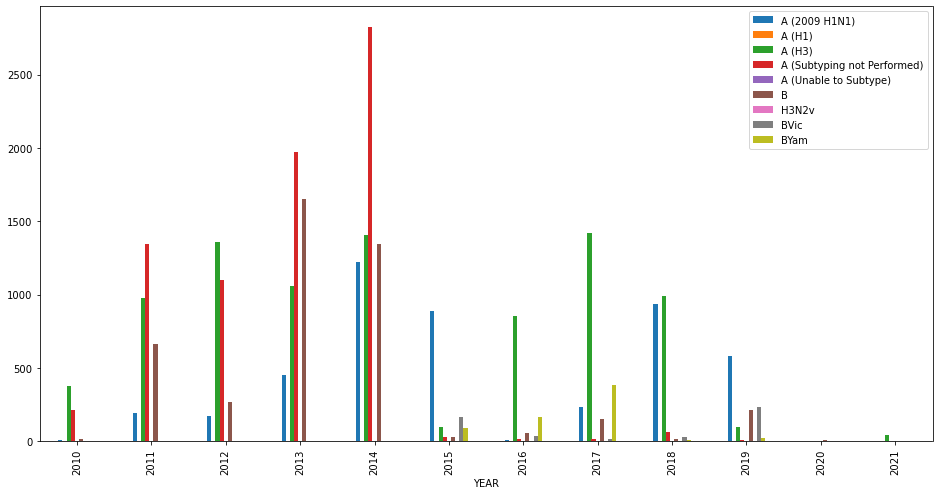

In [60]:
NY.plot(x='YEAR', y=['A (2009 H1N1)','A (H1)','A (H3)','A (Subtyping not Performed)', 
                         'A (Unable to Subtype)', 'B', 'H3N2v', 'BVic', 'BYam'], kind = 'bar', figsize = (16, 8))
plt.show;

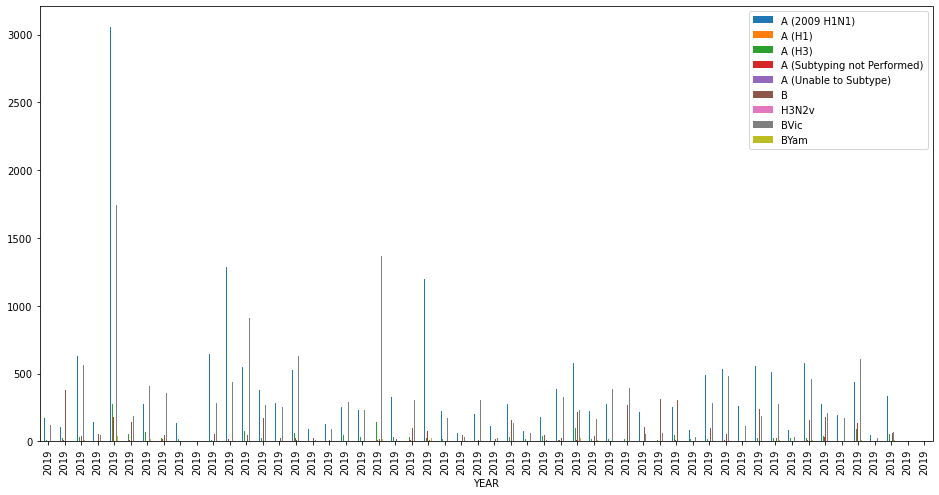

In [48]:
year2019.plot(x='YEAR', y=['A (2009 H1N1)','A (H1)','A (H3)','A (Subtyping not Performed)', 
                         'A (Unable to Subtype)', 'B', 'H3N2v', 'BVic', 'BYam'], kind = 'bar', figsize = (16, 8))
plt.show;

In [78]:
# flupop.drop(flupop[flupop['REGION'] == 'District of Columbia'].index, inplace=True)
flupop.drop(flupop[flupop['REGION'] == 'Virgin Islands'].index, inplace=True)
flupop.drop(flupop[flupop['REGION'] == 'New York City'].index, inplace=True)

flupop.to_csv('../data/flupop.csv')

In [37]:
flupop.REGION.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [38]:

FL = flu_df.loc[flu_df.REGION == 'Florida']
FL

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
45,Florida,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,Florida,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Florida,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,Florida,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,Florida,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Florida,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,Florida,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,Florida,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,Florida,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,Florida,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


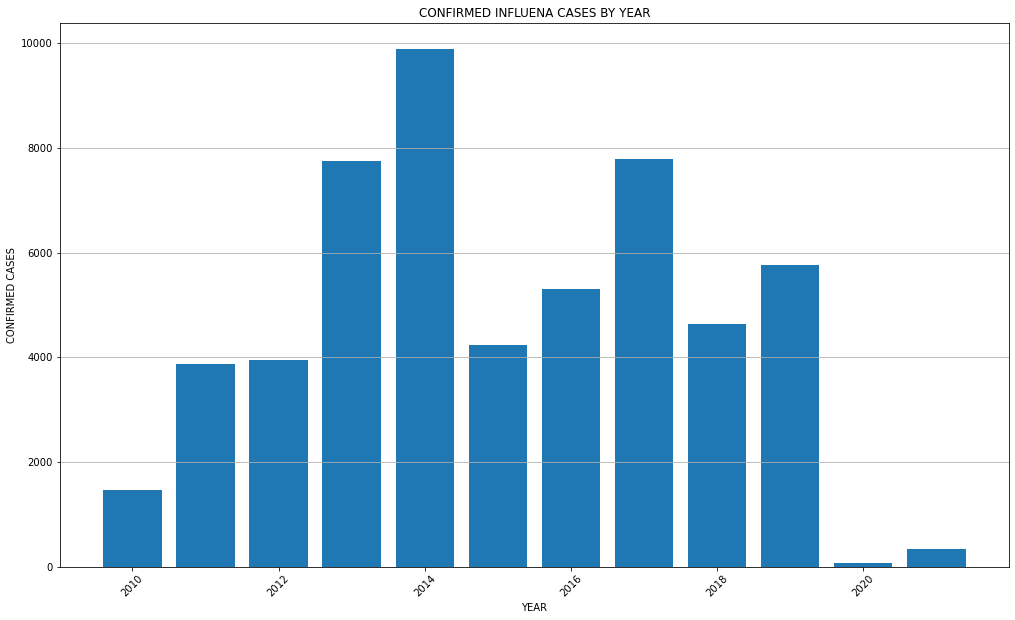

In [56]:
fig = plt.figure(figsize = (17, 10))
plt.bar(flupop.YEAR, flupop['Total'])
plt.xticks(rotation = 45)
plt.grid(b=None , which='both', axis='y')
plt.xlabel('YEAR')
plt.ylabel('CONFIRMED CASES')
plt.title('CONFIRMED INFLUENA CASES BY YEAR');

In [68]:
flupop19 = flupop.loc[flupop.YEAR == 2019]
flupop19

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total,POPULATION,per 1000
486,Alabama,2019,174.0,0.0,6.0,0.0,0.0,5.0,0.0,123.0,0.0,308.0,4907965.0,0.062755
487,Alaska,2019,102.0,0.0,25.0,6.0,0.0,375.0,0.0,0.0,0.0,508.0,733603.0,0.692473
488,Arizona,2019,632.0,0.0,33.0,0.0,0.0,38.0,0.0,560.0,8.0,1271.0,7291843.0,0.174304
489,Arkansas,2019,146.0,0.0,1.0,4.0,0.0,54.0,0.0,45.0,0.0,250.0,3020985.0,0.082754
490,California,2019,3055.0,0.0,272.0,182.0,0.0,475.0,0.0,1742.0,36.0,5762.0,39437610.0,0.146104
491,Colorado,2019,552.0,0.0,53.0,10.0,0.0,145.0,0.0,187.0,0.0,947.0,5758486.0,0.164453
492,Connecticut,2019,272.0,0.0,69.0,0.0,0.0,2.0,0.0,410.0,15.0,768.0,3566022.0,0.215366
493,Delaware,2019,507.0,0.0,26.0,14.0,0.0,44.0,0.0,359.0,2.0,952.0,976668.0,0.974743
494,District of Columbia,2019,138.0,0.0,18.0,0.0,0.0,0.0,0.0,120.0,2.0,278.0,708253.0,0.392515
495,Florida,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21492056.0,0.000000


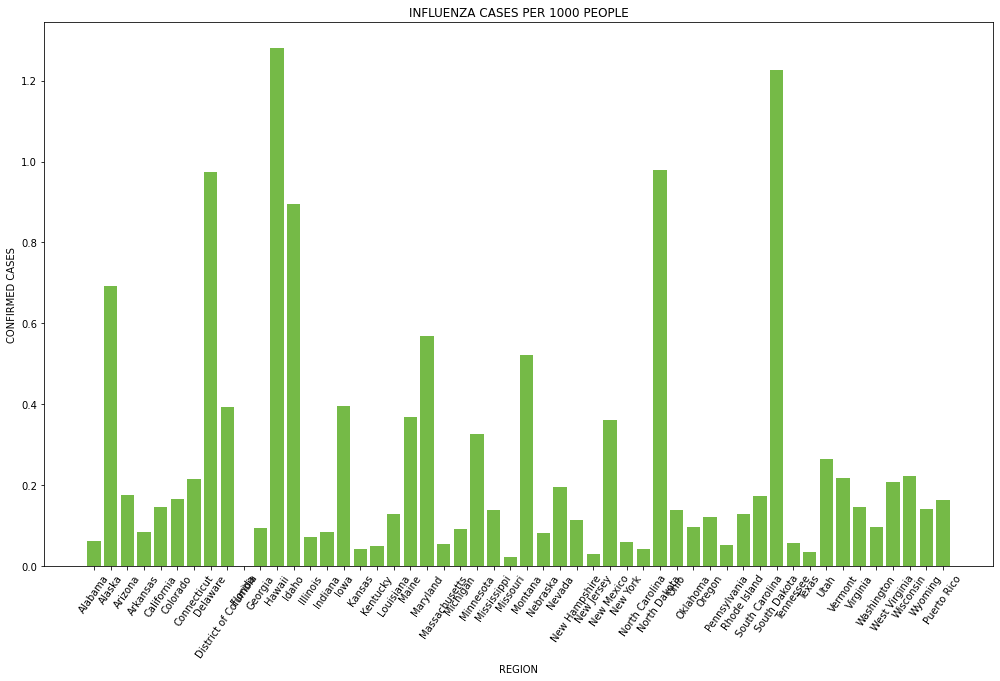

In [69]:
fig = plt.figure(figsize = (17, 10))
plt.bar(flupop19.REGION, flupop19['per 1000'], color = (0.4,0.7,0.2,0.9))
plt.xticks(rotation = 55)
plt.xlabel('REGION')
plt.ylabel('CONFIRMED CASES')
plt.title('INFLUENZA CASES PER 1000 PEOPLE');

In [70]:
flupop20 = flupop.loc[flupop.YEAR == 2020]
flupop20

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total,POPULATION,per 1000
540,Alabama,2020,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,6.0,4921532.0,0.001219
541,Alaska,2020,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,7.0,731158.0,0.009574
542,Arizona,2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,7421401.0,0.000269
543,Arkansas,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3030522.0,0.000000
544,California,2020,0.0,0.0,3.0,10.0,0.0,6.0,0.0,1.0,3.0,23.0,39368078.0,0.000584
545,Colorado,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5807719.0,0.000000
546,Connecticut,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3557006.0,0.000281
547,Delaware,2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986809.0,0.001013
548,District of Columbia,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,712816.0,0.000000
549,Florida,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21733312.0,0.000000


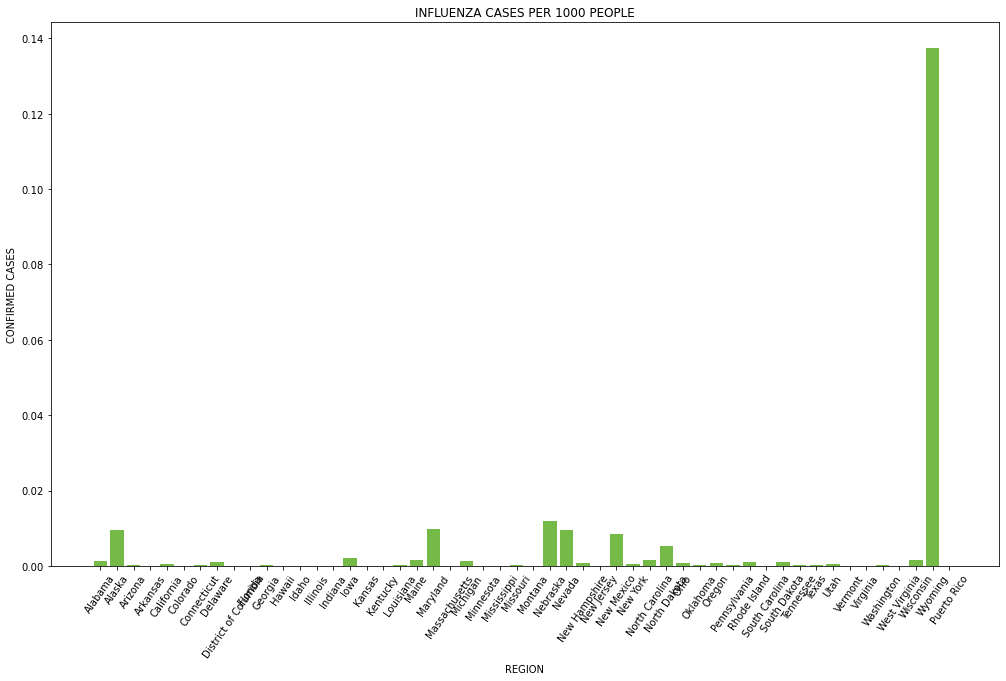

In [72]:
fig = plt.figure(figsize = (17, 10))
plt.bar(flupop20.REGION, flupop20['per 1000'], color = (0.4,0.7,0.2,0.9))
plt.xticks(rotation = 55)
plt.xlabel('REGION')
plt.ylabel('CONFIRMED CASES')
plt.title('INFLUENZA CASES PER 1000 PEOPLE');

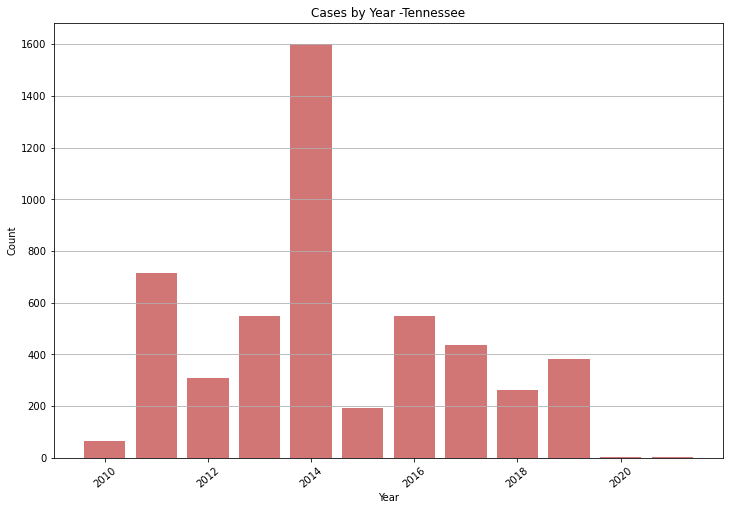

In [41]:
plt.figure(figsize = (12,8))
plt.bar('YEAR', 'Total', data = TN, color = (0.8,0.4,0.4,0.9))
plt.grid(b=None , which='both', axis='y')

plt.xticks(rotation = 40)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Cases by Year -Tennessee')
plt.show()

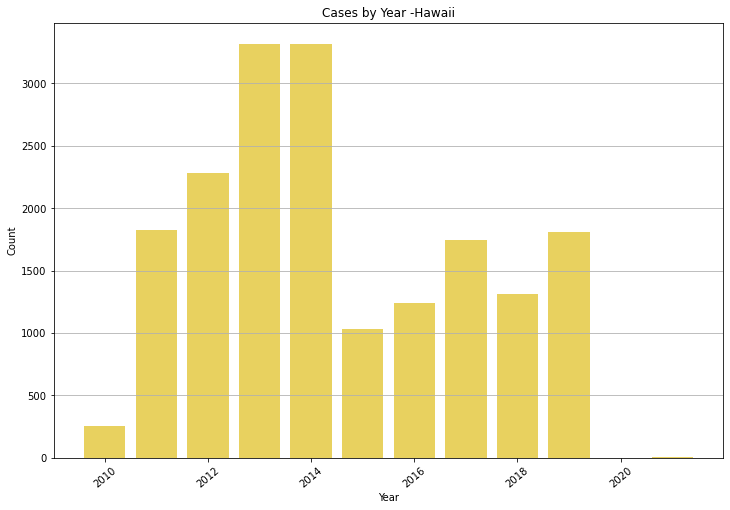

In [42]:
plt.figure(figsize = (12,8))
plt.bar('YEAR', 'Total', data = HI, color = (0.9,0.8,0.3,0.9))
plt.grid(b=None , which='both', axis='y')

plt.xticks(rotation = 40)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Cases by Year -Hawaii')
plt.show()

In [43]:
# pull in state population data (by year) and add to flu_df
# run a function to find flu cases per capita to find "hotspots" in state database
# sum every state for each year for clear virus impact data

In [62]:
TN19 = TN.loc[TN.YEAR == 2019]
TN19

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
258,Tennessee,2019,260.0,0.0,5.0,1.0,0.0,0.0,0.0,116.0,1.0,383.0


In [63]:
TN20 = TN.loc[TN.YEAR == 2020]
TN20

,REGION,YEAR,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,BVic,BYam,Total
312,Tennessee,2020,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


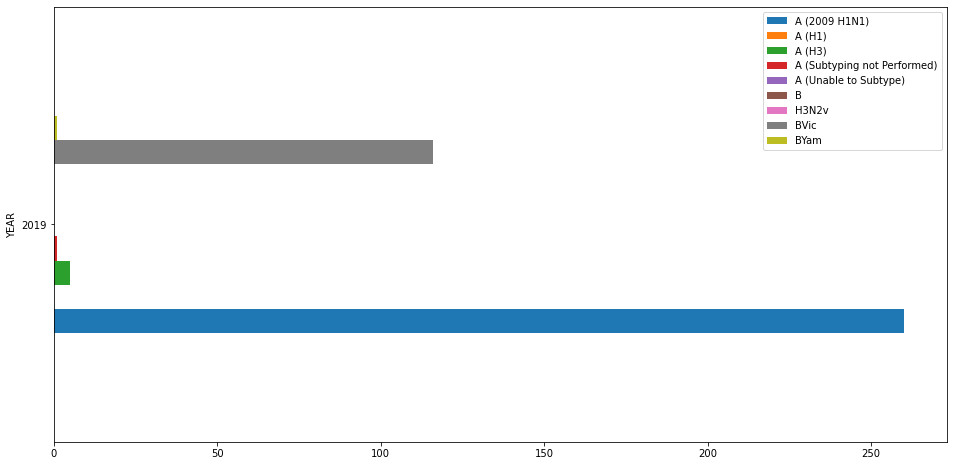

In [74]:
TN19.plot(x='YEAR', y=['A (2009 H1N1)','A (H1)','A (H3)','A (Subtyping not Performed)', 
                         'A (Unable to Subtype)', 'B', 'H3N2v', 'BVic', 'BYam'], kind = 'barh', figsize = (16, 8))
plt.show;

In [9]:
# old_data = pd.pivot_table(
#     test,
#     index = ['REGION', 'YEAR'],
#     aggfunc = {'A (2009 H1N1)' : np.sum, 'A (H1)' : np.sum, 'A (H3)' : np.sum, 'A (Subtyping not Performed)' : np.sum, 
#                'A (Unable to Subtype)' : np.sum, 'B' : np.sum, 'H3N2v' : np.sum})
# old_data.head()

In [ ]:
# public_lab = pd.pivot_table(
#     public_lab,
#     index = ['REGION', 'YEAR'],
#     aggfunc = {'A (2009 H1N1)' : np.sum, 'A (H3)' : np.sum, 'A (Subtyping not Performed)' : np.sum, 'B' : np.sum, 
#                'BVic' : np.sum, 'BYam' : np.sum, 'H3N2v' : np.sum})

In [ ]:
# public_lab.reset_index()
# public_lab.head(10)

In [ ]:
# public_lab.columns

In [17]:
# merged_df = pd.merge(public_lab, old_data, on = 'A (2009 H1N1)', how = 'left')

In [23]:
# merged_df

,A (2009 H1N1),A (H3)_x,A (Subtyping not Performed)_x,B_x,BVic,BYam,H3N2v_x,A (H1),A (H3)_y,A (Subtyping not Performed)_y,A (Unable to Subtype),B_y,H3N2v_y
0,59.0,16.0,1.0,2.0,2.0,2.0,0.0,0.0,1396.0,287.0,0.0,541.0,1.0
1,3.0,227.0,1.0,2.0,15.0,14.0,0.0,0.0,4.0,0.0,0.0,22.0,0.0
2,3.0,227.0,1.0,2.0,15.0,14.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0
3,3.0,227.0,1.0,2.0,15.0,14.0,0.0,0.0,7.0,0.0,0.0,11.0,0.0
4,3.0,227.0,1.0,2.0,15.0,14.0,0.0,0.0,30.0,13.0,0.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,0.0,155.0,181.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4478,0.0,155.0,181.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4479,0.0,155.0,181.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4480,0.0,155.0,181.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# merged = pd.merge(gourds, type_names, on = 'type_id', how = 'inner')

In [ ]:
# merged.groupby('type_name').mean().sort_values('weight', ascending = False)

In [ ]:
# plt.scatter(merged.type_name, merged.weight)
# plt.xticks(rotation = 45)
# plt.xlabel('Gourd Type')
# plt.ylabel('Weight in Lbs')
# plt.title('Weight Distribution by Gourd Type');

In [ ]:
#  create dataframe:
#  1. combined early years, public lab, and clinical lab dataframes. 
#     a. combine weeks 1- 40
#     b. add 'total cases' column, that adds all positive specimens for weeks 1-40
#     c. change season description in public_labs to year,

In [ ]:
#  create 3-5 dataframes, one for each state, that drills down to the county level
# will need to find state dataframes for each, national does not drill down enough

In [ ]:
# top10_fp = merged.loc[merged.type_name == 'Field Pumpkin'].sort_values('place').head(90)['grower_name'].drop_duplicates()